## 1. Imports & Loading the Graph

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

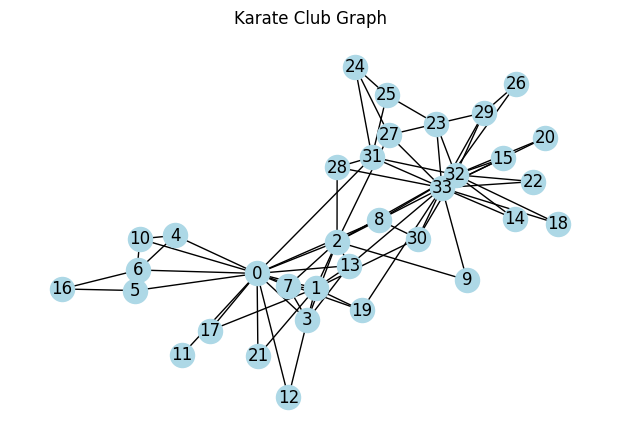

In [2]:
# Load Karate Club graph
G = nx.karate_club_graph()

plt.figure(figsize=(6,4))
nx.draw(G, with_labels=True, node_color="lightblue")
plt.title("Karate Club Graph")
plt.show()

## 2. Modularity Matrix Function

In [3]:
def modularity_matrix(G, nodes):
    """
    Returns modularity matrix B for subgraph induced by 'nodes'.
    """
    H = G.subgraph(nodes)
    A = nx.to_numpy_array(H)

    k = A.sum(axis=1)
    m = k.sum() / 2

    B = A - np.outer(k, k) / (2*m)
    return B, list(H.nodes())

## 3. One Spectral Modularity Split

In [4]:
def spectral_split(G, nodes):
    B, node_list = modularity_matrix(G, nodes)

    # eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(B)

    # leading eigenvector
    leading = eigvecs[:, -1]

    group1 = [node_list[i] for i in range(len(nodes)) if leading[i] >= 0]
    group2 = [node_list[i] for i in range(len(nodes)) if leading[i] < 0]

    return group1, group2

## 4.Recursive Splitting (3–4 levels max)

In [5]:
communities = [list(G.nodes())]   # start with all nodes

final_groups = []

# we will allow up to 3 rounds of splitting
MAX_DEPTH = 3

for depth in range(MAX_DEPTH):
    next_groups = []

    for group in communities:
        if len(group) > 6:   # split only larger groups
            g1, g2 = spectral_split(G, group)
            next_groups += [g1, g2]
        else:
            next_groups.append(group)

    communities = next_groups

final_groups = communities
final_groups


[[3, 12],
 [1, 2, 7, 13, 17, 19, 21],
 [5, 6, 16],
 [0, 4, 10, 11],
 [23, 24, 25, 27, 28, 31],
 [26, 29],
 [32, 33, 8, 9, 14, 15, 18, 20, 22, 30]]

##5. Visualize Communities

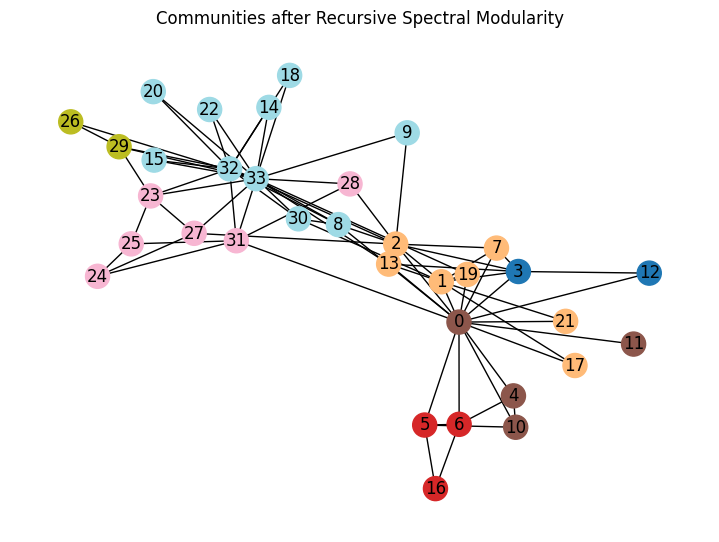

In [6]:
# Assign each community a color index
color_map = {}
for i, group in enumerate(final_groups):
    for node in group:
        color_map[node] = i

colors = [color_map[n] for n in G.nodes()]

plt.figure(figsize=(7,5))
nx.draw(G, with_labels=True, node_color=colors, cmap='tab20')
plt.title("Communities after Recursive Spectral Modularity")
plt.show()

##6. Centrality Metrics (Before vs After)

In [7]:
deg = nx.degree_centrality(G)
bet = nx.betweenness_centrality(G)
clo = nx.closeness_centrality(G)
clust = nx.clustering(G)

In [8]:
def top3(metric_dict):
    return sorted(metric_dict.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top Degree:", top3(deg))
print("Top Betweenness:", top3(bet))
print("Top Closeness:", top3(clo))
print("Top Clustering:", top3(clust))

Top Degree: [(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365), (2, 0.30303030303030304), (1, 0.2727272727272727)]
Top Betweenness: [(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114), (2, 0.14365680615680618), (31, 0.13827561327561325)]
Top Closeness: [(0, 0.5689655172413793), (2, 0.559322033898305), (33, 0.55), (31, 0.5409836065573771), (8, 0.515625)]
Top Clustering: [(7, 1.0), (12, 1.0), (14, 1.0), (15, 1.0), (16, 1.0)]


##7. Plot Metric Distributions

Degree

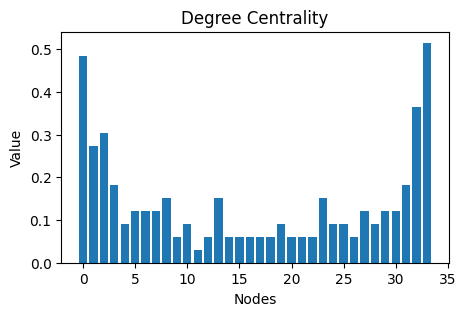

In [9]:
plt.figure(figsize=(5,3))
plt.bar(deg.keys(), deg.values())
plt.title("Degree Centrality")
plt.xlabel("Nodes")
plt.ylabel("Value")
plt.show()

Betweenness

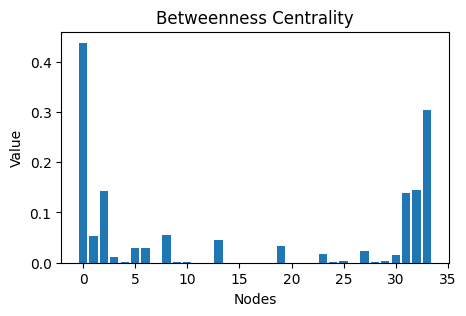

In [10]:
plt.figure(figsize=(5,3))
plt.bar(bet.keys(), bet.values())
plt.title("Betweenness Centrality")
plt.xlabel("Nodes")
plt.ylabel("Value")
plt.show()

Closeness

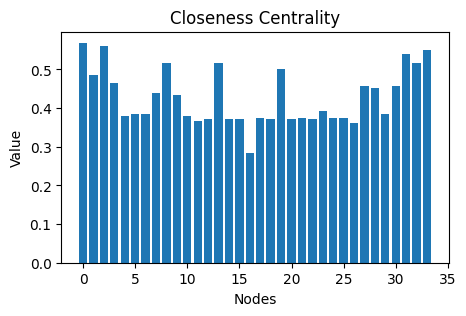

In [11]:
plt.figure(figsize=(5,3))
plt.bar(clo.keys(), clo.values())
plt.title("Closeness Centrality")
plt.xlabel("Nodes")
plt.ylabel("Value")
plt.show()

Clustering

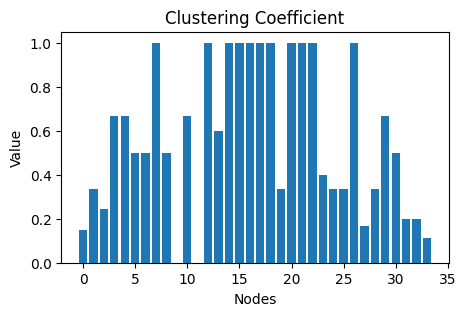

In [12]:
plt.figure(figsize=(5,3))
plt.bar(clust.keys(), clust.values())
plt.title("Clustering Coefficient")
plt.xlabel("Nodes")
plt.ylabel("Value")
plt.show()

##8. Simple Medium-Level Discussion

In [13]:
discussion = """
## Discussion

The spectral modularity method splits the Karate Club graph into clear
groups that resemble the real-life factions. A few observations:

### 1. Central Nodes
Nodes **0** and **33** consistently appear as the most central.
They have:
- High degree
- High betweenness
- High closeness

This is expected because they are the main leaders of the club
(Mr. Hi and the Administrator).

### 2. Effect of Splitting on Centralities
Before splitting, many shortest paths pass through the leaders.
After communities separate, some nodes lose betweenness because
fewer shortest paths cross between groups.

### 3. Clustering Behavior
Once the graph is divided, each community becomes more tightly connected.
This increases the clustering coefficient inside smaller groups.

### Overall
The method shows how community detection and centrality are related.
Important nodes remain important even after splitting, but their roles change
as the structure becomes more modular.
"""

display(Markdown(discussion))



## Discussion

The spectral modularity method splits the Karate Club graph into clear 
groups that resemble the real-life factions. A few observations:

### 1. Central Nodes
Nodes **0** and **33** consistently appear as the most central.  
They have:
- High degree
- High betweenness
- High closeness

This is expected because they are the main leaders of the club 
(Mr. Hi and the Administrator).

### 2. Effect of Splitting on Centralities
Before splitting, many shortest paths pass through the leaders.  
After communities separate, some nodes lose betweenness because 
fewer shortest paths cross between groups.

### 3. Clustering Behavior
Once the graph is divided, each community becomes more tightly connected.  
This increases the clustering coefficient inside smaller groups.

### Overall
The method shows how community detection and centrality are related.  
Important nodes remain important even after splitting, but their roles change 
as the structure becomes more modular.
